# 📡 **Telecom X Challenge**

Este proyecto tiene como objetivo evaluar y aplicar los conocimientos adquiridos como analista de datos en la empresa Telecom X. A partir del análisis detallado del archivo proporcionado, se elaborará un informe completo que explore en profundidad las causas detrás de la alta tasa de cancelación de clientes. El propósito final es identificar los factores que han contribuido a la pérdida de clientes y proponer soluciones basadas en datos que permitan a la empresa tomar decisiones estratégicas para mejorar la retención.


##📌 **Extracción**

Importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

In [1]:
#Comienzo importando la biblioteca Pandas
import pandas as pd

In [2]:
#Ahora importo el archivo
dt = pd.read_json('/content/TelecomX_Data.json')

In [3]:
#Comprueblo la información dentro del archivo
dt

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


Se trata de un archivo que contiene 6 columnas, con 4 de ellas anidadas, el siguiente paso será extraer la información de las columnas.

In [5]:
customer = pd.json_normalize(dt['customer'])
phone = pd.json_normalize(dt['phone'])
internet = pd.json_normalize(dt['internet'])
account = pd.json_normalize(dt['account'])

In [6]:
#Ahora uniré las clolumnas al DF original
dt = pd.concat([dt, customer, phone, internet, account], axis=1)

dt.sample(5)

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
6732,9277-JOOMO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,0,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,24.60,86.35
4816,6598-RFFVI,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'One year', 'PaperlessBilling': '...",Male,0,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.30,28.3
6977,9611-CTWIH,Yes,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,0,No,No,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.45,240.45
2487,3470-OBUET,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),74.00,4868.4
2474,3452-GWUIN,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.95,1760.25


In [7]:
#Ahora eliminaré las columnas anidadas que se encuentran en el DF ya que se ha extraído la información

datos = dt.drop(['customer', 'phone', 'internet', 'account'], axis=1)

In [8]:
#Compruebo.
datos.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
4832,6617-WLBQC,No,Female,0,Yes,Yes,23,Yes,Yes,Fiber optic,...,No,No,No,No,No,One year,No,Credit card (automatic),81.85,1810.85
6923,9537-VHDTA,No,Female,0,No,Yes,1,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,No,Mailed check,51.20,51.2
4374,5995-WWKKG,No,Female,0,No,No,37,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,19.80,695.05
6589,9060-HJJRW,No,Female,0,No,No,51,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),56.40,2928.5
2313,3223-DWFIO,No,Male,1,No,No,4,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Electronic check,69.35,261.65


Primera parte, concluída.

##🔧 **Transformación**

Comprender la estructura del dataset y el significado de sus columnas. Esta etapa servirá para identificar qué variables son más relevantes para el análisis de evasión de clientes.

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión.

In [9]:
#Comienzo revisando la información de las columnas
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [10]:
#A primera vista noto que: Charges.Total, debe ser una columna tipo float. Reviso la información que contiene la columna primero
datos['Charges.Total'].value_counts()

,count
Charges.Total,
20.2,11
,11
19.75,9
19.55,9
19.9,9
...,...
1993.2,1
72.1,1
1237.85,1


In [11]:
import numpy as np

In [12]:
#Ahora elimino los caracteres que me pueden impedir transformar a float
datos['Charges.Total'] = datos['Charges.Total'].str.replace(',', '').replace('$', '').replace(' ', '').replace('', None)
#Tranformo a float
datos['Charges.Total'] = datos['Charges.Total'].astype(np.float64)
#Reviso
datos['Charges.Total'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: Charges.Total
Non-Null Count  Dtype  
--------------  -----  
7256 non-null   float64
dtypes: float64(1)
memory usage: 56.9 KB


In [13]:
#Reviso los datos
datos['Charges.Total'].isna().value_counts()

,count
Charges.Total,
False,7256
True,11


In [14]:
#Identifico por qué están vacías esas filas.
total_nulos = datos['Charges.Total'].isna()
datos[total_nulos]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [15]:
#Noto que se trata de clientes que al parecer recién se suscribieron a la compañía por lo que no aportarán relación relevante para el estudio, así que eliminaré esas filas.

datos = datos.drop(datos[total_nulos].index, axis = 0)

#Aplico reset al indice
datos = datos.reset_index(drop=True)

In [16]:
datos.value_counts().sum()

np.int64(7256)

In [17]:
datos['Charges.Total'].isna().value_counts()

,count
Charges.Total,
False,7256


In [18]:
#Ahora reviso las demás columnas.
datos.sample(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
3685,5091-HFAZW,No,Female,0,No,No,2,Yes,No,Fiber optic,...,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,91.15,168.50
2064,2908-ZTPNF,No,Female,0,No,No,36,No,No phone service,DSL,...,Yes,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),34.85,1267.20
2556,3572-UOLYZ,No,Female,0,No,Yes,46,Yes,Yes,Fiber optic,...,No,Yes,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),84.80,3958.85


In [19]:
datos.nunique()

,0
customerID,7256
Churn,3
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,72
PhoneService,2
MultipleLines,3
InternetService,3


In [20]:
#La mayoría son columnas Yes/No. que deben tener solo 2 datos unícos = Yes/No.
#Analizaré las columnas que tienen más de 2 datos.

cols_revisar = datos[['Churn','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']]

In [21]:
for col in cols_revisar:
    print(f"\n--- {col} ---")
    print(datos[col].value_counts())


--- Churn ---
Churn
No     5163
Yes    1869
        224
Name: count, dtype: int64

--- MultipleLines ---
MultipleLines
No                  3490
Yes                 3061
No phone service     705
Name: count, dtype: int64

--- InternetService ---
InternetService
Fiber optic    3198
DSL            2483
No             1575
Name: count, dtype: int64

--- OnlineSecurity ---
OnlineSecurity
No                     3607
Yes                    2074
No internet service    1575
Name: count, dtype: int64

--- OnlineBackup ---
OnlineBackup
No                     3181
Yes                    2500
No internet service    1575
Name: count, dtype: int64

--- DeviceProtection ---
DeviceProtection
No                     3194
Yes                    2487
No internet service    1575
Name: count, dtype: int64

--- TechSupport ---
TechSupport
No                     3581
Yes                    2100
No internet service    1575
Name: count, dtype: int64

--- StreamingTV ---
StreamingTV
No                     2895
Y

In [22]:
#Defino los diccionarios con la información que debe llevar cada fila

mapeos = {

    'Churn': {'Yes': 1, 'No': 0},
    'Partner': {'Yes': 1, 'No': 0},
    'Dependents': {'Yes': 1, 'No': 0},
    'PhoneService': {'Yes': 1, 'No': 0},
    'PaperlessBilling': {'Yes': 1, 'No': 0},
    'MultipleLines': {'Yes': 1, 'No': 0, 'No phone service': 0},
    'OnlineSecurity': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'OnlineBackup': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'DeviceProtection': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'TechSupport': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'StreamingTV': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'StreamingMovies': {'Yes': 1, 'No': 0, 'No internet service': 0},


    'gender' : {'Female': 1, 'Male': 0}
        }
#La columna SeniorCitizen ya está en binario.


#Aplico los mapeos usando la herramienta .replace()
datos.replace(mapeos, inplace=True)




datos.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   int64  
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   int64  
 5   Dependents        7256 non-null   int64  
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   int64  
 8   MultipleLines     7256 non-null   int64  
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   int64  
 11  OnlineBackup      7256 non-null   int64  
 12  DeviceProtection  7256 non-null   int64  
 13  TechSupport       7256 non-null   int64  
 14  StreamingTV       7256 non-null   int64  
 15  StreamingMovies   7256 non-null   int64  
 16  Contract          7256 non-null   object 


/tmp/ipython-input-22-631003548.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos.replace(mapeos, inplace=True)


In [23]:
datos['Churn'].value_counts()

,count
Churn,
0,5163
1,1869
,224


In [24]:
#Hay 224 filas que están "vacías" pero tienen un espacio.

churn_vacio = datos['Churn'].str.strip() == ''
datos[churn_vacio]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,1,0,0,0,11,1,1,Fiber optic,...,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,0,0,0,0,71,1,0,No,...,0,0,0,0,0,Two year,1,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,0,0,0,0,29,1,0,DSL,...,1,0,1,0,0,One year,1,Electronic check,58.75,1696.20
98,0162-RZGMZ,,1,1,0,0,5,1,0,DSL,...,1,0,1,0,0,Month-to-month,0,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,0,1,1,0,65,1,1,Fiber optic,...,1,1,0,1,1,One year,1,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,9840-GSRFX,,1,0,0,0,14,1,1,DSL,...,1,0,0,0,0,One year,1,Mailed check,54.25,773.20
7169,9872-RZQQB,,1,0,1,0,49,0,0,DSL,...,0,0,0,1,0,Month-to-month,0,Bank transfer (automatic),40.65,2070.75
7200,9920-GNDMB,,0,0,0,0,9,1,1,Fiber optic,...,0,0,0,0,0,Month-to-month,1,Electronic check,76.25,684.85
7228,9955-RVWSC,,1,0,1,1,67,1,0,No,...,0,0,0,0,0,Two year,1,Bank transfer (automatic),19.25,1372.90


In [25]:
print(datos[churn_vacio].nunique())

customerID          224
Churn                 1
gender                2
SeniorCitizen         2
Partner               2
Dependents            2
tenure               64
PhoneService          2
MultipleLines         2
InternetService       3
OnlineSecurity        2
OnlineBackup          2
DeviceProtection      2
TechSupport           2
StreamingTV           2
StreamingMovies       2
Contract              3
PaperlessBilling      2
PaymentMethod         4
Charges.Monthly     188
Charges.Total       223
dtype: int64


In [26]:
#Como comprobé hay datos relevantes en estas columnas, lo que indica que se debe colocar churn 0

datos.loc[churn_vacio, 'Churn'] = 0


In [27]:
#Ahora sí cambio el type de la columna Churn
datos['Churn'] = datos['Churn'].astype(np.int64)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   int64  
 2   gender            7256 non-null   int64  
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   int64  
 5   Dependents        7256 non-null   int64  
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   int64  
 8   MultipleLines     7256 non-null   int64  
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   int64  
 11  OnlineBackup      7256 non-null   int64  
 12  DeviceProtection  7256 non-null   int64  
 13  TechSupport       7256 non-null   int64  
 14  StreamingTV       7256 non-null   int64  
 15  StreamingMovies   7256 non-null   int64  
 16  Contract          7256 non-null   object 


In [28]:
#Aplico la herramienta get_dummies para dividir las columnas

#InternetService
datos = pd.get_dummies(datos, columns=['InternetService'], prefix=' ', dummy_na=False)

#Contract
datos = pd.get_dummies(datos, columns=['Contract'], prefix=' ', dummy_na=False)

#PaymentMethod
datos = pd.get_dummies(datos, columns=['PaymentMethod'], prefix=' ', dummy_na=False)



datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customerID                   7256 non-null   object 
 1   Churn                        7256 non-null   int64  
 2   gender                       7256 non-null   int64  
 3   SeniorCitizen                7256 non-null   int64  
 4   Partner                      7256 non-null   int64  
 5   Dependents                   7256 non-null   int64  
 6   tenure                       7256 non-null   int64  
 7   PhoneService                 7256 non-null   int64  
 8   MultipleLines                7256 non-null   int64  
 9   OnlineSecurity               7256 non-null   int64  
 10  OnlineBackup                 7256 non-null   int64  
 11  DeviceProtection             7256 non-null   int64  
 12  TechSupport                  7256 non-null   int64  
 13  StreamingTV       

In [29]:
#Se crearon  columnas nuevas quedan en formato Booleano las trasformare a tipo Entero.

for col in datos.columns:
    if datos[col].dtype == bool:
        datos[col] = datos[col].astype(int)

datos.sample(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,...,_DSL,_Fiber optic,_No,_Month-to-month,_One year,_Two year,_Bank transfer (automatic),_Credit card (automatic),_Electronic check,_Mailed check
3014,4194-FJARJ,0,1,0,1,1,54,1,1,1,...,1,0,0,0,0,1,1,0,0,0
45,0076-LVEPS,0,0,0,0,1,29,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1197,1708-PBBOA,0,1,0,0,0,42,0,0,1,...,1,0,0,0,1,0,0,0,1,0


In [30]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customerID                   7256 non-null   object 
 1   Churn                        7256 non-null   int64  
 2   gender                       7256 non-null   int64  
 3   SeniorCitizen                7256 non-null   int64  
 4   Partner                      7256 non-null   int64  
 5   Dependents                   7256 non-null   int64  
 6   tenure                       7256 non-null   int64  
 7   PhoneService                 7256 non-null   int64  
 8   MultipleLines                7256 non-null   int64  
 9   OnlineSecurity               7256 non-null   int64  
 10  OnlineBackup                 7256 non-null   int64  
 11  DeviceProtection             7256 non-null   int64  
 12  TechSupport                  7256 non-null   int64  
 13  StreamingTV       

En este punto ya todos los datos están estandarizados, pero el DF está desordenado. Lo organizaré, trasladando las columnas de `_No`, `_DSL` y `_Fiber optic `antes de la columna `OnlineSecurity` y pasaré las columnas `Charges.Monthtly` y `Charges.Total` al final.

In [31]:
col_grupo1 = [' _No', ' _DSL', ' _Fiber optic']
col_grupo2 = ['Charges.Monthly', 'Charges.Total']

col_actuales = datos.columns.tolist()


nuevo_orden = []

for col in col_actuales:
    if col == 'OnlineSecurity':
        break
    if col not in col_grupo1 + col_grupo2:
         nuevo_orden.append(col)

for col_internet in col_grupo1:
    if col_internet in datos.columns:
        nuevo_orden.append(col_internet)

if 'OnlineSecurity' in datos.columns:
     nuevo_orden.append('OnlineSecurity')

indice_referencia = col_actuales.index('OnlineSecurity')
for col in col_actuales[indice_referencia + 1:]:
    if col not in col_grupo1 + col_grupo2:
             nuevo_orden.append(col)

for col_precio in col_grupo2:
    if col_precio in datos.columns:
        nuevo_orden.append(col_precio)


print("\nNuevo orden de columnas:")
print(nuevo_orden)




Nuevo orden de columnas:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', ' _No', ' _DSL', ' _Fiber optic', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', ' _Month-to-month', ' _One year', ' _Two year', ' _Bank transfer (automatic)', ' _Credit card (automatic)', ' _Electronic check', ' _Mailed check', 'Charges.Monthly', 'Charges.Total']


In [32]:
datos_reorganizado = datos[nuevo_orden].copy()

datos = datos_reorganizado

datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,_No,...,PaperlessBilling,_Month-to-month,_One year,_Two year,_Bank transfer (automatic),_Credit card (automatic),_Electronic check,_Mailed check,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,1,0,1,1,9,1,0,0,...,1,0,1,0,0,0,0,1,65.6,593.30
1,0003-MKNFE,0,0,0,0,0,9,1,1,0,...,0,1,0,0,0,0,0,1,59.9,542.40
2,0004-TLHLJ,1,0,0,0,0,4,1,0,0,...,1,1,0,0,0,0,1,0,73.9,280.85
3,0011-IGKFF,1,0,1,1,0,13,1,0,0,...,1,1,0,0,0,0,1,0,98.0,1237.85
4,0013-EXCHZ,1,1,1,1,0,3,1,0,0,...,1,1,0,0,0,0,0,1,83.9,267.40


In [33]:
#Elimino las columnas no relevantes

datos = datos.drop(datos[['customerID',' _No']], axis = 1)
datos.columns.tolist()

['Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 ' _DSL',
 ' _Fiber optic',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 ' _Month-to-month',
 ' _One year',
 ' _Two year',
 ' _Bank transfer (automatic)',
 ' _Credit card (automatic)',
 ' _Electronic check',
 ' _Mailed check',
 'Charges.Monthly',
 'Charges.Total']

In [34]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        7256 non-null   int64  
 1   gender                       7256 non-null   int64  
 2   SeniorCitizen                7256 non-null   int64  
 3   Partner                      7256 non-null   int64  
 4   Dependents                   7256 non-null   int64  
 5   tenure                       7256 non-null   int64  
 6   PhoneService                 7256 non-null   int64  
 7   MultipleLines                7256 non-null   int64  
 8    _DSL                        7256 non-null   int64  
 9    _Fiber optic                7256 non-null   int64  
 10  OnlineSecurity               7256 non-null   int64  
 11  OnlineBackup                 7256 non-null   int64  
 12  DeviceProtection             7256 non-null   int64  
 13  TechSupport       

In [35]:
#Antes de crear la columna Cuentas_diarias modificare algunos nombres de las columnas para mejorar su presentacion.

nombres_nuevos = {
    'Churn': 'Cancelacion',
    'gender': 'Género',
    'SeniorCitizen': 'Jubilado',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Meses_contrato',
    'PhoneService': 'Servicio_telefonico',
    'MultipleLines': 'Multiples_lineas',
    ' _Fiber optic' : 'Fibra_optica',
    ' _DSL': 'DSL',
    'OnlineSecurity': 'Seguridad_Ol',
    'OnlineBackup': 'Backup_Ol',
    'DeviceProtection': 'Proteccion_dispositivo',
    'TechSupport': 'Soporte_tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_peliculas',
    ' _Month-to-month': 'Contrato_Mensual',
    ' _One year': 'Contrato_Anual',
    ' _Two year': 'Contrato_Bianual',
    'PaperlessBilling': 'Facturacion_electronica',
    'Charges.Monthly': 'Cuentas_mensuales',
    'Charges.Total': 'Cuentas_totales',
    ' _Bank transfer (automatic)': 'Pago_Trf.Bancaria_Auto',
    ' _Credit card (automatic)': 'Pago_TCredito_Auto',
    ' _Electronic check': 'Pago_ChequeElectronico',
    ' _Mailed check': 'Pago_ChequePorCorreo',
}

In [36]:
#Ahora cambio los nombres con la herramienta .rename

datos.rename(columns=nombres_nuevos, inplace=True)

In [37]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cancelacion              7256 non-null   int64  
 1   Género                   7256 non-null   int64  
 2   Jubilado                 7256 non-null   int64  
 3   Pareja                   7256 non-null   int64  
 4   Dependientes             7256 non-null   int64  
 5   Meses_contrato           7256 non-null   int64  
 6   Servicio_telefonico      7256 non-null   int64  
 7   Multiples_lineas         7256 non-null   int64  
 8   DSL                      7256 non-null   int64  
 9   Fibra_optica             7256 non-null   int64  
 10  Seguridad_Ol             7256 non-null   int64  
 11  Backup_Ol                7256 non-null   int64  
 12  Proteccion_dispositivo   7256 non-null   int64  
 13  Soporte_tecnico          7256 non-null   int64  
 14  Streaming_TV            

In [38]:
#Columna Cuentas_diarias
dias_mes = 30
datos['Cuentas_diarias'] = datos['Cuentas_mensuales'] / dias_mes
datos.sample(3)

,Cancelacion,Género,Jubilado,Pareja,Dependientes,Meses_contrato,Servicio_telefonico,Multiples_lineas,DSL,Fibra_optica,...,Contrato_Mensual,Contrato_Anual,Contrato_Bianual,Pago_Trf.Bancaria_Auto,Pago_TCredito_Auto,Pago_ChequeElectronico,Pago_ChequePorCorreo,Cuentas_mensuales,Cuentas_totales,Cuentas_diarias
1444,0,1,0,1,1,5,1,0,1,0,...,1,0,0,0,0,0,1,49.4,232.55,1.646667
7074,0,1,1,1,1,48,0,0,1,0,...,0,1,0,1,0,0,0,29.9,1388.75,0.996667
3660,0,1,0,0,1,43,1,0,0,1,...,0,1,0,0,1,0,0,106.0,4532.30,3.533333


##📊 **Carga y análisis**

En esta etapa, el reto es revisar los datos previamente tratados y organizados, para analizar cuál es el motivo de la cancelación de clientes.

In [39]:
#Analizo los datos de cancelación.
cancelaron = datos['Cancelacion'] == 1

no_cancelaron = datos['Cancelacion'] == 0

In [40]:
datos[cancelaron].describe()

,Cancelacion,Género,Jubilado,Pareja,Dependientes,Meses_contrato,Servicio_telefonico,Multiples_lineas,DSL,Fibra_optica,...,Contrato_Mensual,Contrato_Anual,Contrato_Bianual,Pago_Trf.Bancaria_Auto,Pago_TCredito_Auto,Pago_ChequeElectronico,Pago_ChequePorCorreo,Cuentas_mensuales,Cuentas_totales,Cuentas_diarias
count,1869.0,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,...,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,1.0,0.502408,0.254682,0.357945,0.174425,17.979133,0.909042,0.454789,0.245586,0.693954,...,0.885500,0.088818,0.025682,0.138042,0.124131,0.573034,0.164794,74.441332,1531.796094,2.481378
std,0.0,0.500128,0.435799,0.479524,0.379576,19.531123,0.287626,0.498085,0.430549,0.460972,...,0.318502,0.284556,0.158228,0.345036,0.329819,0.494770,0.371094,24.666053,1890.822994,0.822202
min,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.850000,18.850000,0.628333
25%,1.0,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.150000,134.500000,1.871667
50%,1.0,1.000000,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,79.650000,703.550000,2.655000
75%,1.0,1.000000,1.000000,1.000000,0.000000,29.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,94.200000,2331.300000,3.140000
max,1.0,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.350000,8684.800000,3.945000


In [41]:
datos[no_cancelaron].describe()

,Cancelacion,Género,Jubilado,Pareja,Dependientes,Meses_contrato,Servicio_telefonico,Multiples_lineas,DSL,Fibra_optica,...,Contrato_Mensual,Contrato_Anual,Contrato_Bianual,Pago_Trf.Bancaria_Auto,Pago_TCredito_Auto,Pago_ChequeElectronico,Pago_ChequePorCorreo,Cuentas_mensuales,Cuentas_totales,Cuentas_diarias
count,5387.0,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,...,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000
mean,0.0,0.491554,0.131056,0.527195,0.342306,37.397253,0.900687,0.410433,0.375719,0.352887,...,0.436235,0.250975,0.312790,0.246705,0.247819,0.255058,0.250418,61.394932,2540.440867,2.046498
std,0.0,0.499975,0.337493,0.499306,0.474525,24.144085,0.299110,0.491958,0.484353,0.477912,...,0.495963,0.433614,0.463673,0.431134,0.431786,0.435935,0.433294,31.106744,2330.360507,1.036891
min,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.0,0.000000,0.000000,0.000000,0.000000,14.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.100000,568.000000,0.836667
50%,0.0,0.000000,0.000000,1.000000,0.000000,37.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.550000,1669.400000,2.151667
75%,0.0,1.000000,0.000000,1.000000,1.000000,61.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,88.700000,4247.825000,2.956667
max,0.0,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8672.450000,3.958333


In [42]:
#Realizare los graficos de estos datos para mejorar su presentacion y visualización.
import matplotlib.pyplot as plt
import seaborn as sns

###Comparativa entre los clientes que cancelaron y los que no cancelaron

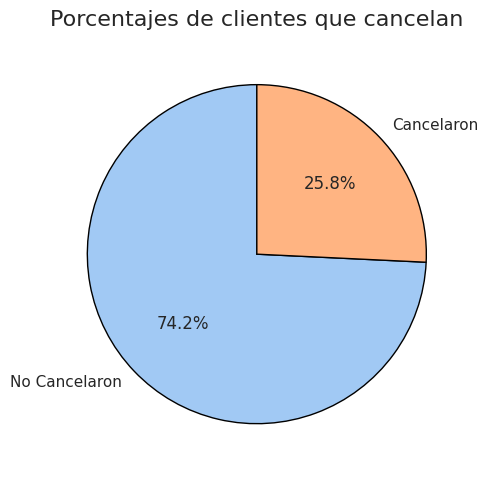

In [81]:
sns.set_theme(style="dark")


valores = datos['Cancelacion'].value_counts()
etiquetas = ['No Cancelaron', 'Cancelaron']
colores = sns.color_palette("pastel")[:2]


plt.figure(figsize=(5, 5))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=colores, wedgeprops={'edgecolor': 'black'})
plt.title('Porcentajes de clientes que cancelan', fontsize=16)
plt.axis('equal')
plt.tight_layout()

plt.savefig("/content/porcentajes_cancelacion.png", dpi=300, bbox_inches='tight')

plt.show()


###Comparación de cancelación vs tiempo y gasto mensual y diario

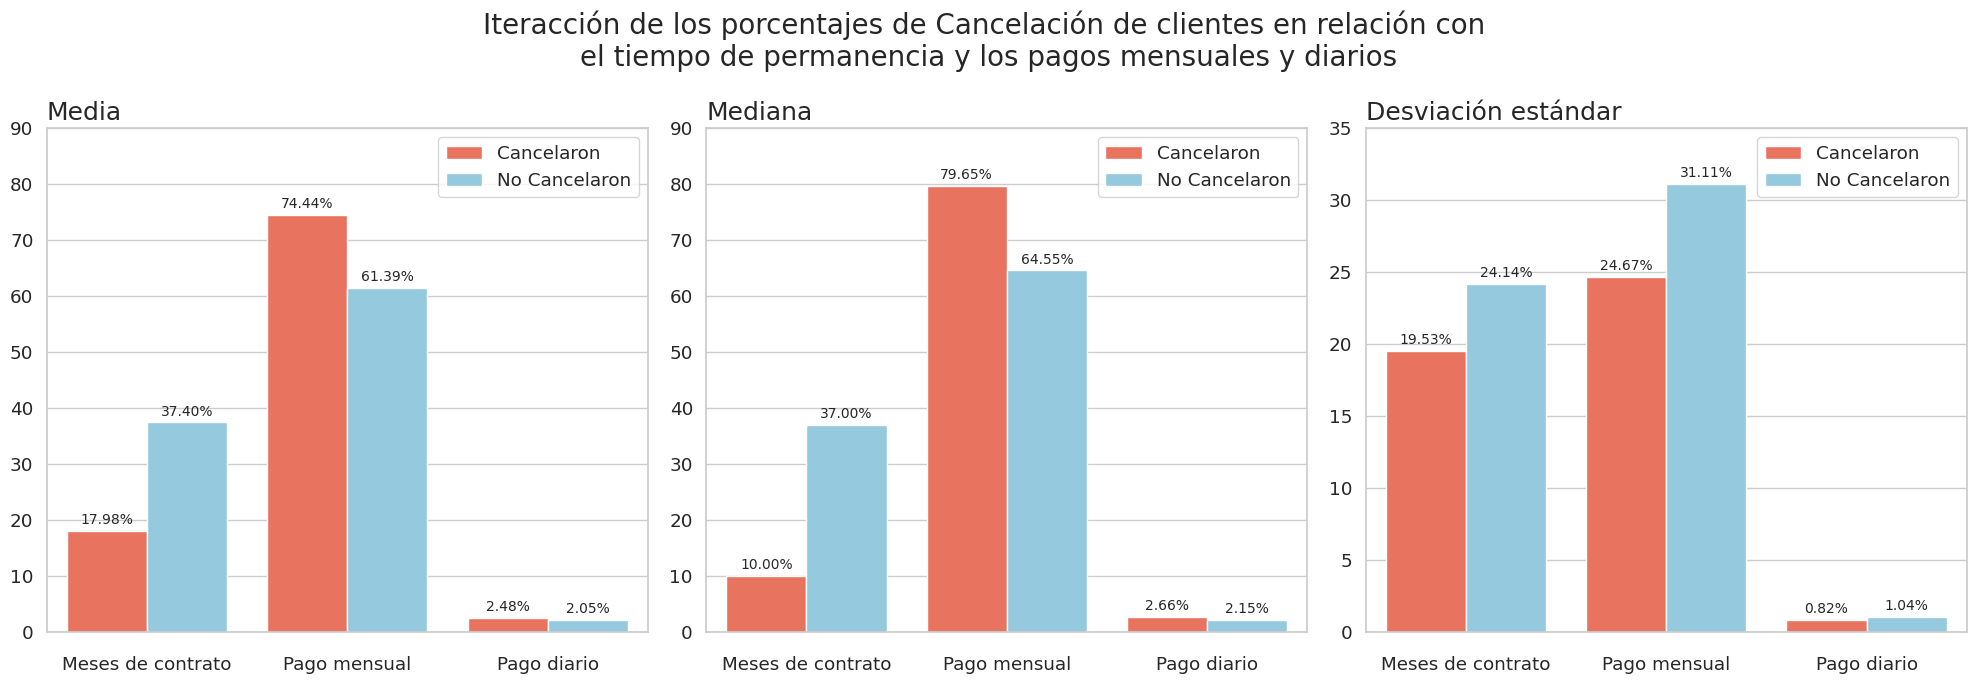

In [64]:
sns.set_theme(style="whitegrid")
sns.set_theme(style="whitegrid", font_scale=1.1)
colores = sns.color_palette("pastel")[:2]
sns.set_context("notebook", font_scale=1.2)


cols = ['Meses_contrato', 'Cuentas_mensuales', 'Cuentas_diarias']

nombres_personalizados = {
    'Meses_contrato': 'Meses de contrato',
    'Cuentas_mensuales': 'Pago mensual',
    'Cuentas_diarias': 'Pago diario'
}


def resumen_estadisticas(datos, columnas):
    lista = []
    for col in columnas:
        cancelaron = datos[datos['Cancelacion'] == 1][col]
        no_cancelaron = datos[datos['Cancelacion'] == 0][col]

        lista.append(['Media', col, 'Cancelaron', cancelaron.mean()])
        lista.append(['Media', col, 'No Cancelaron', no_cancelaron.mean()])
        lista.append(['Mediana', col, 'Cancelaron', cancelaron.median()])
        lista.append(['Mediana', col, 'No Cancelaron', no_cancelaron.median()])
        lista.append(['Desviación estándar', col, 'Cancelaron', cancelaron.std()])
        lista.append(['Desviación estándar', col, 'No Cancelaron', no_cancelaron.std()])

    df = pd.DataFrame(lista, columns=['Estadistica', 'Variable', 'Grupo', 'Valor'])
    return df


df_resumen = resumen_estadisticas(datos, cols)


fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=False)


estadisticas = ['Media', 'Mediana', 'Desviación estándar']
colores = {'Cancelaron': 'tomato', 'No Cancelaron': 'skyblue'}

for i, estadistica in enumerate(estadisticas):
    df_plot = df_resumen[df_resumen['Estadistica'] == estadistica].copy()
    df_plot['Variable'] = df_plot['Variable'].map(nombres_personalizados)

    sns.barplot(data=df_plot, x='Variable', y='Valor', hue='Grupo',
                palette=colores, ax=axes[i])

    axes[i].set_title(estadistica, fontsize = 18, loc ='left')



    if estadistica == 'Media':
        axes[i].set_ylim(0, 90)
    elif estadistica == 'Mediana':
        axes[i].set_ylim(0, 90)
    elif estadistica == 'Desviación estándar':
        axes[i].set_ylim(0, 35)

    axes[i].set_ylabel('',)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x',size = 14)
    axes[i].legend(title = '',loc='upper right')

    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.2f%%', label_type='edge', padding=3, fontsize = 10)

plt.suptitle('Iteracción de los porcentajes de Cancelación de clientes en relación con \nel tiempo de permanencia y los pagos mensuales y diarios', fontsize=20)
plt.subplots_adjust(top=0.85)
plt.tight_layout()

plt.savefig("/content/comparacion_pago_mes_dia_y_tiempo.png", dpi=300, bbox_inches='tight')


plt.show()

Con esta última gráfica poremos observar que:
- Los clientes que se fueron, tenían un porcentaje de cobro mensual y diario, más elevado que el de los clientes que se quedaron.

###Comparativa de cancelación por tipo de servicios

In [45]:
servicios = ['Servicio_telefonico', 'Multiples_lineas', 'DSL', 'Fibra_optica']

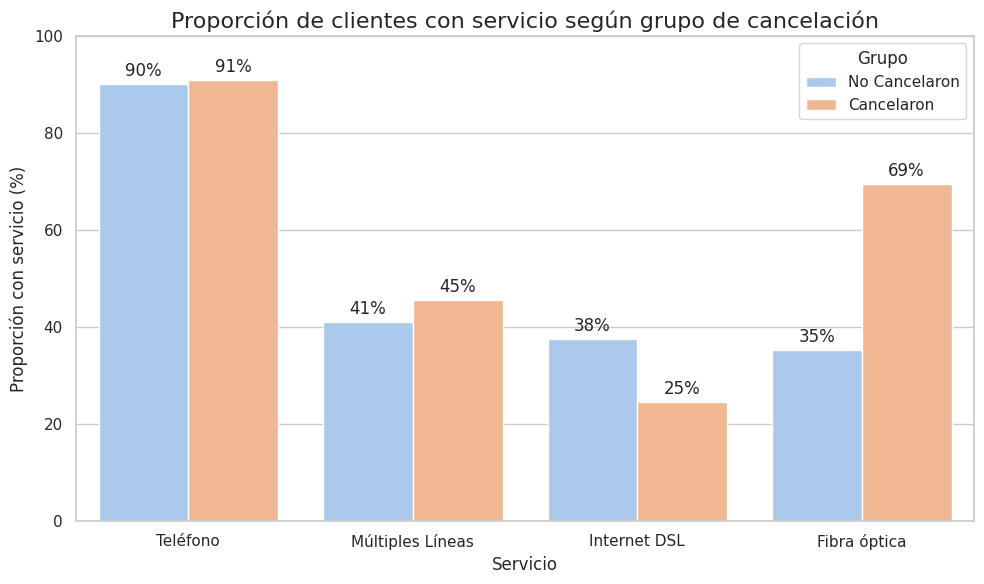

In [72]:
sns.set_theme(style="whitegrid")

nombres_barras = {
    'Servicio_telefonico': 'Teléfono',
    'Multiples_lineas': 'Múltiples Líneas',
    'DSL': 'Internet DSL',
    'Fibra_optica': 'Fibra óptica'
}

df_resultados = []

for servicio in servicios:
    for grupo in [0, 1]:
        subset = datos[datos['Cancelacion'] == grupo]
        total = len(subset)
        con_servicio = subset[servicio].sum()
        proporcion = (con_servicio / total) * 100 if total > 0 else 0

        df_resultados.append([
            nombres_barras[servicio],
            'Cancelaron' if grupo == 1 else 'No Cancelaron',
            proporcion
        ])

df_servicios = pd.DataFrame(df_resultados, columns=['Servicio', 'Grupo', 'Proporcion'])

plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_servicios,
    x='Servicio',
    y='Proporcion',
    hue='Grupo',
    palette='pastel',
    errorbar=None
)

plt.title('Proporción de clientes con servicio según grupo de cancelación', fontsize=16)
plt.xlabel('Servicio')
plt.ylabel('Proporción con servicio (%)')
plt.ylim(0, 100)


for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.0f%%', label_type='edge', padding=3)

plt.savefig("/content/tipos_servicios.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

**Podemos observar que:**

- Con respecto a las líneas múltiples hay una ligera relación de cancelación por parte de los clientes.
- La proporción de clientes que se fuern es mayor con respecto al internet de Fibra óptica.
- Contrario al Servicio de DSL cuyo porcentaje es ligeramente mayor en los clientes que se quedaron.

In [47]:
servicios_adicionales = ['Seguridad_Ol', 'Backup_Ol', 'Proteccion_dispositivo', 'Soporte_tecnico', 'Streaming_TV', 'Streaming_peliculas']

nombres_adicionales = {
    'Seguridad_Ol': 'Seguridad Online',
    'Backup_Ol': 'Backup Online',
    'Proteccion_dispositivo': 'Proteccion Dispositivo',
    'Soporte_tecnico': 'Soporte técnico',
    'Streaming_TV': 'Streaming TV',
    'Streaming_peliculas': 'Streaming películas'
       }


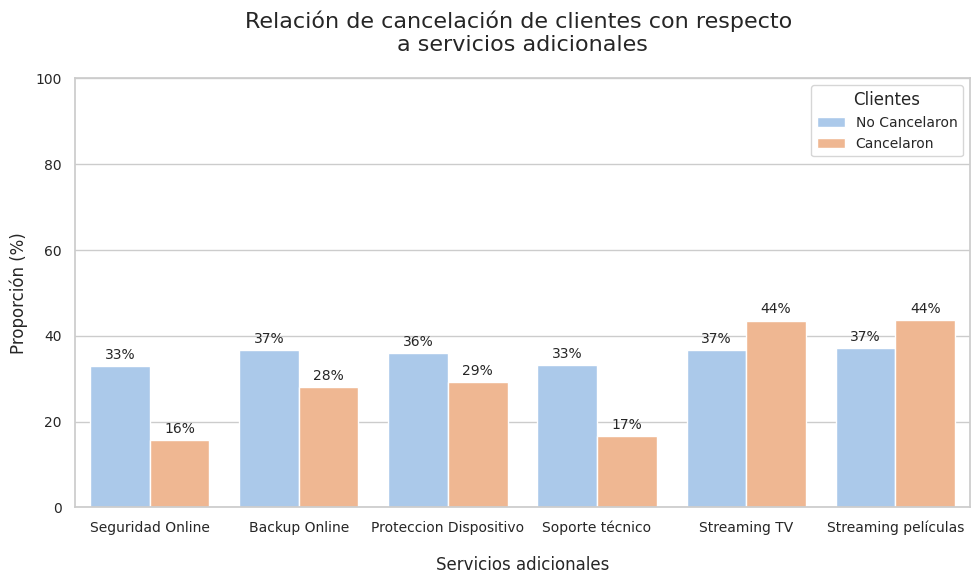

In [48]:
df_adicionales = []

for adicional in servicios_adicionales:
    for grupo in [0, 1]:
        subset = datos[datos['Cancelacion'] == grupo]
        total = len(subset)
        con_el_servicio = subset[adicional].sum()
        proporcion = (con_el_servicio / total) * 100 if total > 0 else 0

        df_adicionales.append([
            nombres_adicionales[adicional],
            'Cancelaron' if grupo == 1 else 'No Cancelaron',
            proporcion
        ])

df_serv_adicionales = pd.DataFrame(df_adicionales, columns=['Adicional', 'Grupo', 'Proporcion'])

plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_serv_adicionales,
    x='Adicional',
    y='Proporcion',
    hue='Grupo',
    palette='pastel',
    errorbar=None
)

plt.title('Relación de cancelación de clientes con respecto \na servicios adicionales', fontsize=16, pad = 20)
plt.xlabel('Servicios adicionales', labelpad = 15)
plt.ylabel('Proporción (%)', labelpad = 5)
plt.ylim(0, 100)
plt.legend(title='Clientes', fontsize = 10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.0f%%', label_type='edge', padding=3, fontsize = 10)

plt.tight_layout()
plt.show()

Según el gráfico los servicios como Seguridad Online, Backup Online y Soporte técnico, tienen más proporción entre los clientes que se quedan.
Y hay baja fidelización de clientes entre los que tienen servicios de streaming.



###**Comparativa de cancelación por tipo de pago**

In [49]:
metodo_pago = ['Pago_Trf.Bancaria_Auto', 'Pago_TCredito_Auto', 'Pago_ChequeElectronico', 'Pago_ChequePorCorreo']

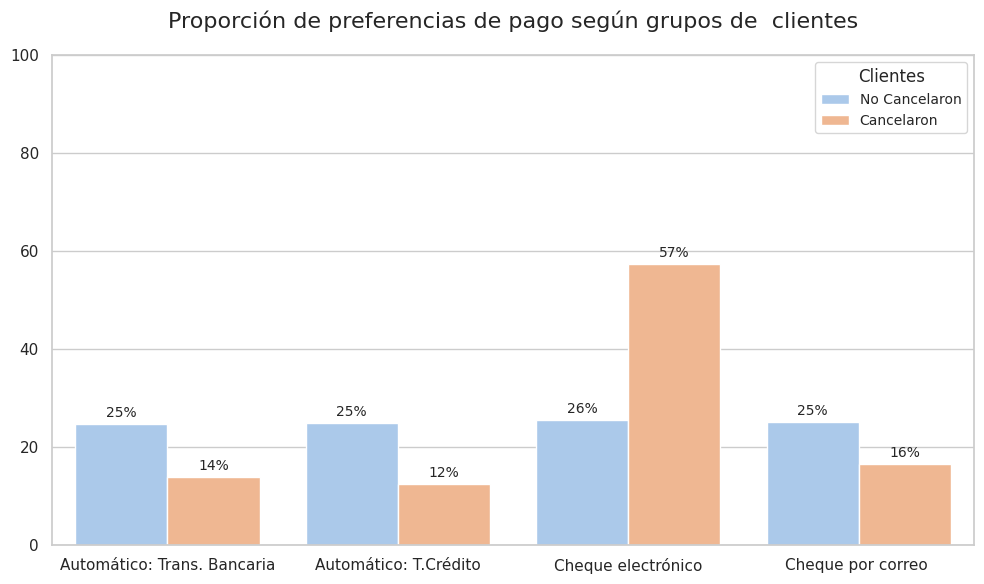

In [65]:
sns.set_theme(style="whitegrid")

nombres_metodos = {
    'Pago_Trf.Bancaria_Auto': 'Automático: Trans. Bancaria',
    'Pago_TCredito_Auto': 'Automático: T.Crédito',
    'Pago_ChequeElectronico': 'Cheque electrónico',
    'Pago_ChequePorCorreo': 'Cheque por correo '
}

df_pagos = []

for metodo in metodo_pago:
    for grupo in [0, 1]:
        subset = datos[datos['Cancelacion'] == grupo]
        total = len(subset)
        preferencia_pago = subset[metodo].sum()
        proporcion = (preferencia_pago / total) * 100 if total > 0 else 0

        df_pagos.append([
            nombres_metodos[metodo],
            'Cancelaron' if grupo == 1 else 'No Cancelaron',
            proporcion
        ])

df_metodo_pago = pd.DataFrame(df_pagos, columns=['Metodo', 'Grupo', 'Proporcion'])

plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_metodo_pago,
    x='Metodo',
    y='Proporcion',
    hue='Grupo',
    palette='pastel',
    errorbar=None
)

plt.title('Proporción de preferencias de pago según grupos de  clientes', fontsize=16, pad = 20)
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Clientes', fontsize = 10)

plt.ylim(0, 100)

for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.0f%%', label_type='edge', padding=3, fontsize = 10)

plt.savefig("/content/grafico_metodos de pago.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

Aqui podemos observar que hay una mayor permanencia entre los clientes que realizan el pago de manera automática.

###**Comparaiva por tipo de contrato**

In [51]:
contratos = ['Contrato_Mensual', 'Contrato_Anual', 'Contrato_Bianual']

nombres_contratos = {
    'Contrato_Mensual': 'Contrato mes a mes',
    'Contrato_Anual': 'Contrato a 1 año',
    'Contrato_Bianual': 'Contrato a 2 años',
}

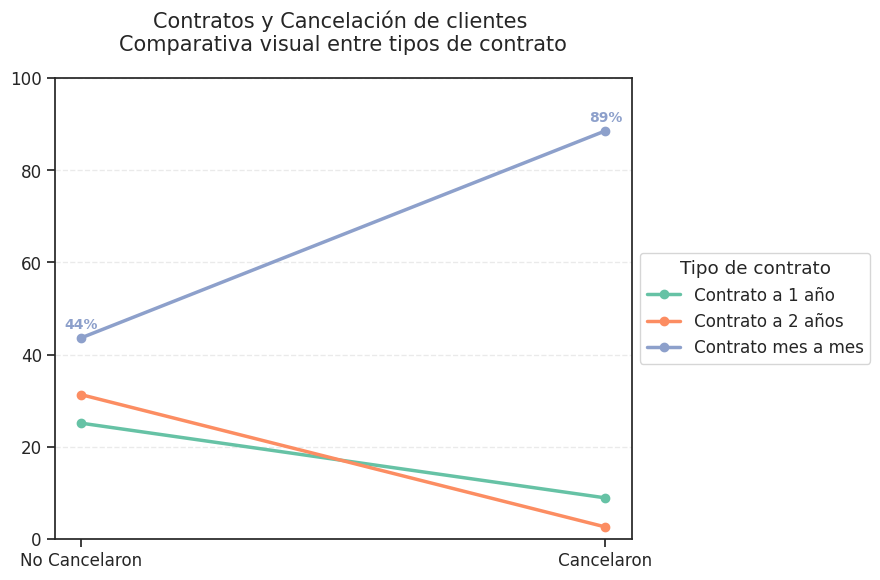

In [66]:
sns.set_theme(style="ticks", font_scale=1.1)


datos_slope = []
for contrato in contratos:
    for grupo in [0, 1]:
        subset = datos[datos['Cancelacion'] == grupo]
        total = len(subset)
        con_contrato = subset[contrato].sum()
        proporcion = (con_contrato / total) * 100 if total > 0 else 0

        datos_slope.append([
            nombres_contratos[contrato],
            'No Cancelaron' if grupo == 0 else 'Cancelaron',
            proporcion
        ])

df_slope = pd.DataFrame(datos_slope, columns=['Contrato', 'Grupo', 'Proporcion'])
pivot = df_slope.pivot(index='Contrato', columns='Grupo', values='Proporcion')

plt.figure(figsize=(9, 6))
colores = sns.color_palette("Set2", n_colors=len(pivot))

for (contrato, fila), color in zip(pivot.iterrows(), colores):
    plt.plot(['No Cancelaron', 'Cancelaron'],
             [fila['No Cancelaron'], fila['Cancelaron']],
             marker='o', linewidth=2.5, color=color, label=contrato)


plt.text('No Cancelaron', fila['No Cancelaron'] + 2, f"{fila['No Cancelaron']:.0f}%",
          ha='center', fontsize=10, weight='bold', color=color)
plt.text('Cancelaron', fila['Cancelaron'] + 2, f"{fila['Cancelaron']:.0f}%",
          ha='center', fontsize=10, weight='bold', color=color)


plt.title('Contratos y Cancelación de clientes \nComparativa visual entre tipos de contrato',
          fontsize=15, loc='center', pad=20)
plt.ylabel('')
plt.ylim(0, 100)
plt.xticks(['No Cancelaron', 'Cancelaron'])
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title='Tipo de contrato', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

plt.savefig("/content/grafico_tipo_contrato.png", dpi=300, bbox_inches='tight')

plt.show()

Se observa mayor retención de clientes con los contratos de 1 a 2 años.

###Cancelación por tipo de clientes

In [53]:
clientes = ['Género','Jubilado','Dependientes']

tipos_clientes = {
      'Género': {0: 'Hombre', 1: 'Mujer'},
      'Jubilado': {0: 'No Jubilado', 1: 'Jubilado'},
    'Dependientes': {0: 'Sin dependientes', 1: 'Con dependientes'}
}



In [54]:
datos_clientes = []

for var in clientes:
    nombre_legible = var

    for estado in [0, 1]:
        for grupo in [0, 1]:
            subset = datos[(datos[var] == estado) & (datos['Cancelacion'] == grupo)]
            total = len(subset)
            datos_clientes.append([

                f"{var}: {tipos_clientes[var][estado]}",
                'Cancelaron' if grupo == 1 else 'No Cancelaron',
                total
            ])

df_clientes = pd.DataFrame(datos_clientes, columns=['Grupo', 'Estado', 'Cantidad'])

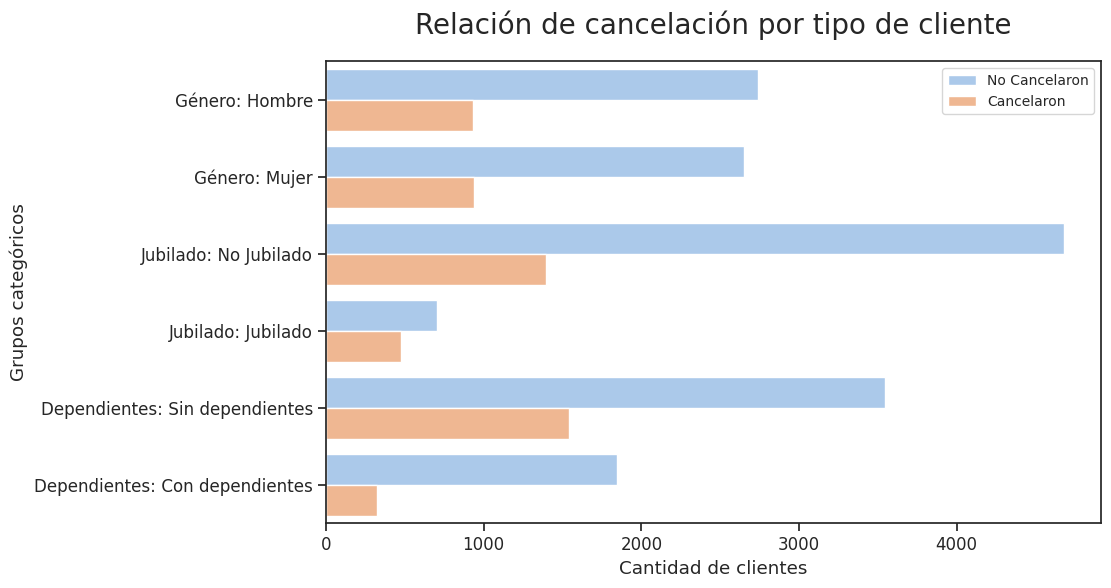

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_clientes, y='Grupo', x='Cantidad', hue='Estado', palette='pastel')

plt.title('Relación de cancelación por tipo de cliente', fontsize=20, pad=20)
plt.xlabel('Cantidad de clientes')
plt.ylabel('Grupos categóricos')
plt.xticks(fontsize=12)
plt.legend(fontsize=10)
plt.show()

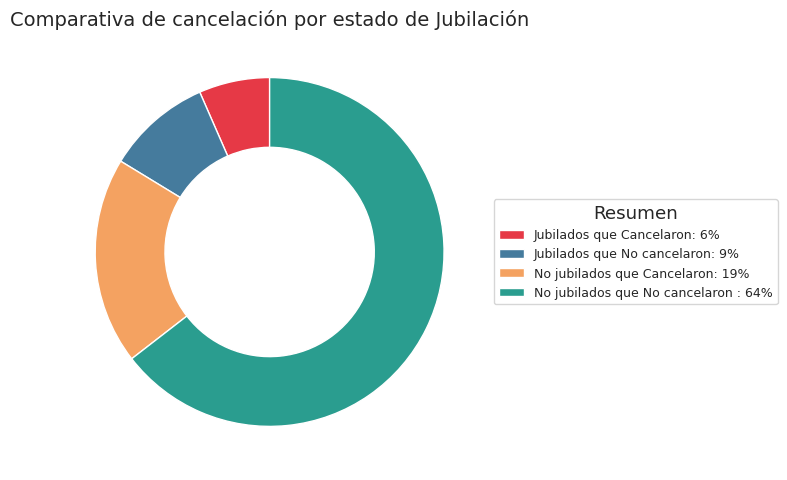

In [77]:
etiquetas = [
    'Jubilados que Cancelaron',
    'Jubilados que No cancelaron',
    'No jubilados que Cancelaron',
    'No jubilados que No cancelaron '
]

valores = [
    len(datos[(datos['Jubilado'] == 1) & (datos['Cancelacion'] == 1)]),
    len(datos[(datos['Jubilado'] == 1) & (datos['Cancelacion'] == 0)]),
    len(datos[(datos['Jubilado'] == 0) & (datos['Cancelacion'] == 1)]),
    len(datos[(datos['Jubilado'] == 0) & (datos['Cancelacion'] == 0)])
]


porcentajes = [v / sum(valores) * 100 for v in valores]
etiquetas_con_porcentaje = [
    f'{label}: {int(p)}%' for label, p in zip(etiquetas, porcentajes)
]

colores = ['#E63946', '#457B9D', '#F4A261', '#2A9D8F']


fig, ax = plt.subplots(figsize=(7, 5))


wedges, _ = ax.pie(
    valores,
    startangle=90,
    colors=colores,
    wedgeprops=dict(width=0.4, edgecolor='white')
)


ax.legend(wedges, etiquetas_con_porcentaje,
          title="Resumen", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=9)

plt.title('Comparativa de cancelación por estado de Jubilación', fontsize=14)
plt.tight_layout()

plt.savefig("/content/clientes_jubilados.png", dpi=300, bbox_inches='tight')

plt.show()

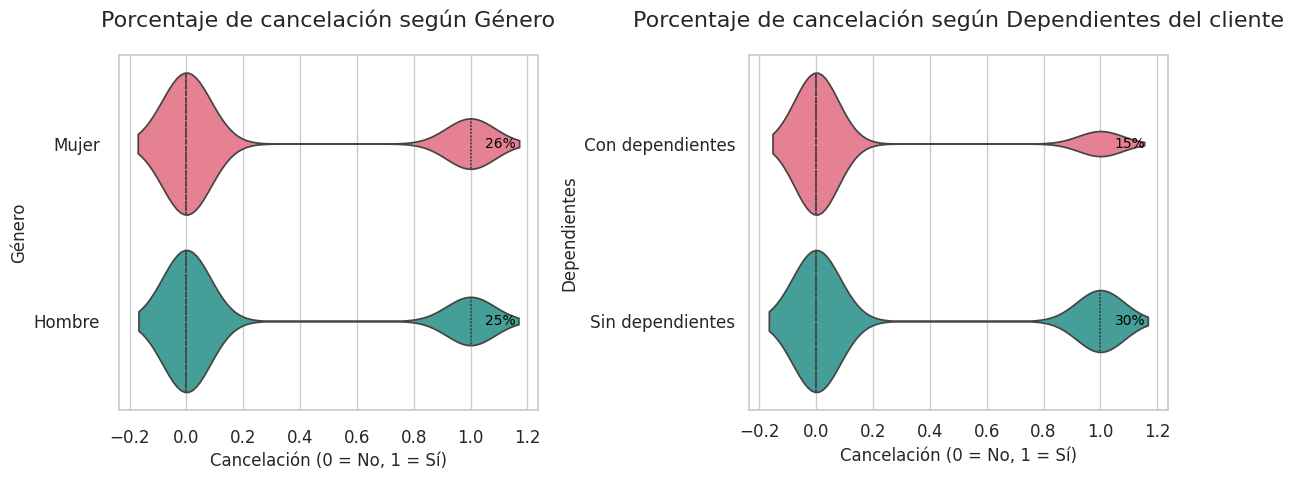

In [76]:
sns.set_theme(style="whitegrid", font_scale=1.1)

datos['Género_txt'] = datos['Género'].map({0: 'Hombre', 1: 'Mujer'})
datos['Dependientes_txt'] = datos['Dependientes'].map({0: 'Sin dependientes', 1: 'Con dependientes'})

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

sns.violinplot(
    data=datos,
    x='Cancelacion',
    y='Género_txt',
    hue='Género_txt',
    palette='husl',
    inner='quartile',
    legend=False,
    ax=axes[0]
)
axes[0].set_title('Porcentaje de cancelación según Género', fontsize = 16, pad = 20)
axes[0].set_xlabel('Cancelación (0 = No, 1 = Sí)', fontsize = 12)
axes[0].set_ylabel('Género', fontsize = 12)
axes[0].tick_params(axis='x',size = 10)
axes[0].tick_params(axis='y',size = 10)


for i, genero in enumerate(['Mujer', 'Hombre']):
    total = len(datos[datos['Género_txt'] == genero])
    cancelados = datos[(datos['Género_txt'] == genero) & (datos['Cancelacion'] == 1)]
    porcentaje = (len(cancelados) / total) * 100
    axes[0].text(1.05, i, f'{porcentaje:.0f}%', va='center', fontsize=10, color='black')


sns.violinplot(
    data=datos,
    x='Cancelacion',
    y='Dependientes_txt',
    hue='Dependientes_txt',
    palette='husl',
    inner='quartile',
    legend=False,
    ax=axes[1]
)
axes[1].set_title('Porcentaje de cancelación según Dependientes del cliente', fontsize = 16, pad = 20 )
axes[1].set_xlabel('Cancelación (0 = No, 1 = Sí)', fontsize = 12)
axes[1].set_ylabel('Dependientes', fontsize = 12)
axes[0].tick_params(axis='x',size = 10)
axes[0].tick_params(axis='y',size = 10)


for i, dep in enumerate(['Con dependientes', 'Sin dependientes']):
    total = len(datos[datos['Dependientes_txt'] == dep])
    cancelados = datos[(datos['Dependientes_txt'] == dep) & (datos['Cancelacion'] == 1)]
    porcentaje = (len(cancelados) / total) * 100
    axes[1].text(1.05, i, f'{porcentaje:.0f}%', va='center', fontsize=10, color='black')


plt.tight_layout()

plt.savefig("/content/genero_y_dependencia.png", dpi=300, bbox_inches='tight')

plt.show()

### Cancelacion de clientes por tiempo de contrato y gasto total

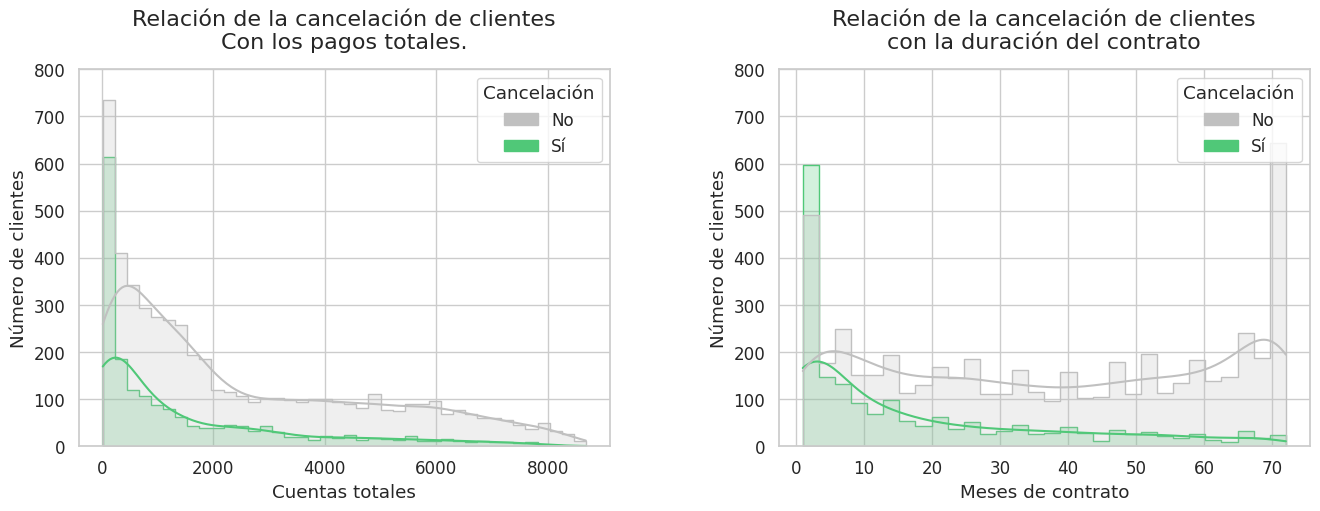

In [69]:
from matplotlib.patches import Patch

sns.set_theme(style="whitegrid", font_scale=1.1)

datos['Cancelacion_txt'] = datos['Cancelacion'].map({0: 'No', 1: 'Sí'})

custom_palette = {'No': '#C0C0C0', 'Sí': '#50C878'}

ig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout={'w_pad': 0.5})

# Gráfico 1 -> Gasto total.
sns.histplot(
    data=datos,
    x='Cuentas_totales',
    hue='Cancelacion_txt',
    hue_order=['No', 'Sí'],
    palette=custom_palette,
    bins=40,
    kde=True,
    ax=axes[0],
    element='step'
)

axes[0].set_title('Relación de la cancelación de clientes\nCon los pagos totales.',fontsize = 16, pad = 15)
axes[0].set_xlabel('Cuentas totales')
axes[0].set_ylabel('Número de clientes')
legend_elements = [
    Patch(facecolor='#C0C0C0', edgecolor='#C0C0C0', label='No'),
    Patch(facecolor='#50C878', edgecolor='#50C878', label='Sí')
    ]
axes[0].legend(handles=legend_elements, title='Cancelación')
axes[0].set_ylim(0, 800)

# Gráfico 1 -> Meses contratados
sns.histplot(
    data=datos,
    x='Meses_contrato',
    hue='Cancelacion_txt',
    hue_order=['No', 'Sí'],
    palette=custom_palette,
    bins=30,
    kde=True,
    ax=axes[1],
    element='step'
)

axes[1].set_title('Relación de la cancelación de clientes\ncon la duración del contrato', fontsize = 16, pad = 15)
axes[1].set_xlabel('Meses de contrato')
axes[1].set_ylabel('Número de clientes')
axes[1].legend(handles=legend_elements, title='Cancelación', loc = 'upper right')
axes[1].set_ylim(0, 800)

plt.savefig("/content/grafico_cuentas_tiempo.png", dpi=300, bbox_inches='tight')


# Mostrar gráfico
plt.show()

###Correlación de cancelación con diferentes variables

In [59]:
datos.columns.tolist()

['Cancelacion',
 'Género',
 'Jubilado',
 'Pareja',
 'Dependientes',
 'Meses_contrato',
 'Servicio_telefonico',
 'Multiples_lineas',
 'DSL',
 'Fibra_optica',
 'Seguridad_Ol',
 'Backup_Ol',
 'Proteccion_dispositivo',
 'Soporte_tecnico',
 'Streaming_TV',
 'Streaming_peliculas',
 'Facturacion_electronica',
 'Contrato_Mensual',
 'Contrato_Anual',
 'Contrato_Bianual',
 'Pago_Trf.Bancaria_Auto',
 'Pago_TCredito_Auto',
 'Pago_ChequeElectronico',
 'Pago_ChequePorCorreo',
 'Cuentas_mensuales',
 'Cuentas_totales',
 'Cuentas_diarias',
 'Género_txt',
 'Dependientes_txt',
 'Cancelacion_txt']

In [60]:
variables_corr = [
    'Cancelacion',
    'Meses_contrato',
    'Servicio_telefonico',
    'DSL',
    'Fibra_optica',
    'Cuentas_mensuales',
    'Cuentas_totales',
    'Cuentas_diarias',
    'Contrato_Mensual',
    'Contrato_Anual',
    'Contrato_Bianual',
    'Pago_Trf.Bancaria_Auto',
    'Pago_TCredito_Auto',
    'Pago_ChequeElectronico',
    'Pago_ChequePorCorreo'
]


nombres_correlacion  = {
    'Cancelacion': 'Cancelación',
    'Meses_contrato': 'Meses de contrato',
    'Servicio_telefonico': 'Servicio telefónico',
    'DSL': 'Internet DSL',
    'Fibra_optica' : 'Internet Fibra óptica',
    'Cuentas_mensuales':'Pago mensual',
    'Cuentas_totales': 'Total pagado',
    'Cuentas_diarias': 'Coste diario',
    'Contrato_Mensual': 'Contrato Mensual',
    'Contrato_Anual': 'Contrato cada 1 año',
    'Contrato_Bianual': 'Contrato cada 2 años',
    'Pago_Trf.Bancaria_Auto': 'Pago Automático: Transf. Bancaria',
    'Pago_TCredito_Auto': 'Pago Automático: T.Crédito',
    'Pago_ChequeElectronico': 'Pago Cheque Electrónico',
    'Pago_ChequePorCorreo': 'Pago Cheque por Correo'
          }

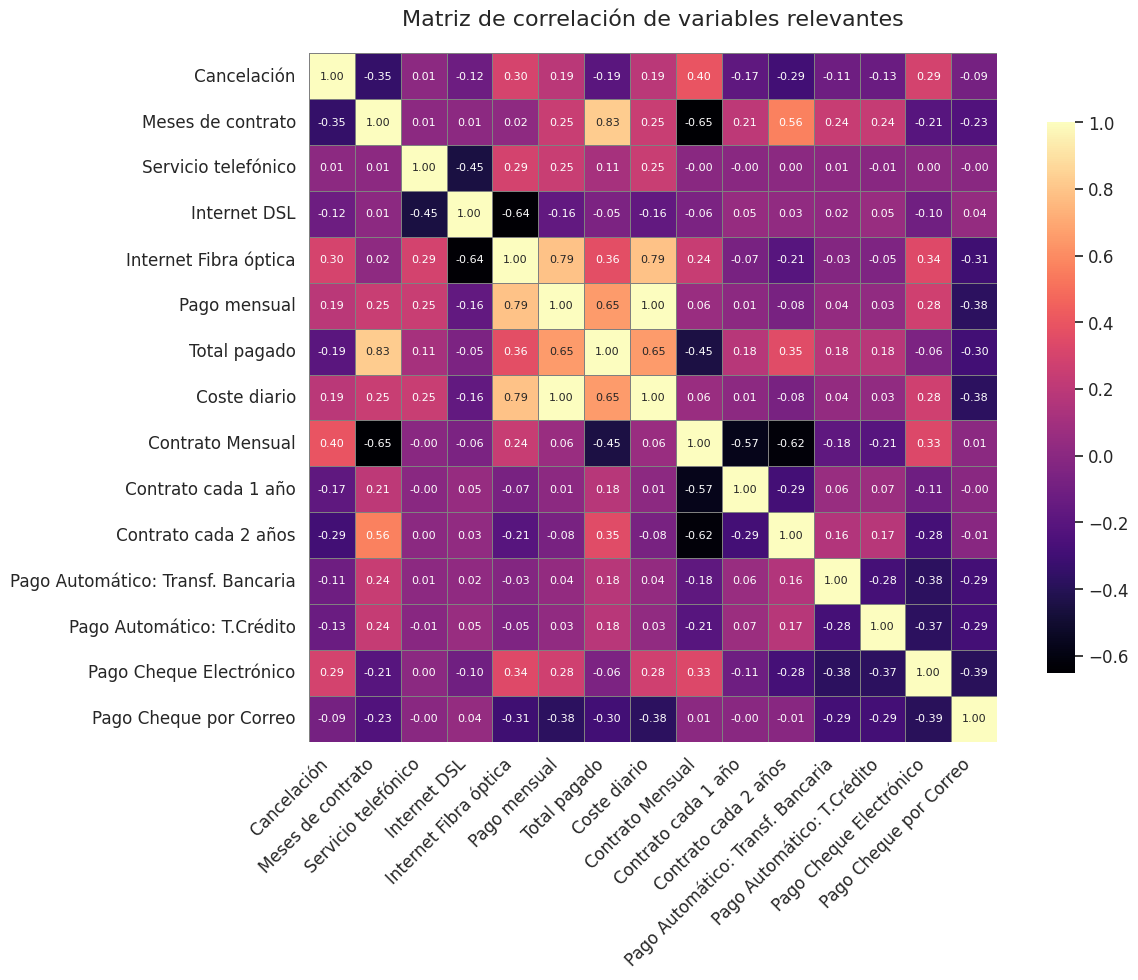

In [70]:
matriz_corr = datos[variables_corr].corr()

matriz_corr.rename(columns=nombres_correlacion, index=nombres_correlacion, inplace=True)

plt.figure(figsize=(13, 10))
sns.heatmap(
    matriz_corr,
    annot=True,
    fmt=".2f",
    cmap="magma",
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 8}
)

plt.title('Matriz de correlación de variables relevantes', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig("/content/correlacion_cancelacion.png", dpi=300, bbox_inches='tight')

plt.show()

In [62]:
correlaciones_cancelacion = matriz_corr.loc['Cancelación'].drop('Cancelación')

top_correlaciones = correlaciones_cancelacion.reindex(
    correlaciones_cancelacion.abs().sort_values(ascending=False).index
)

print("🔝 Variables más correlacionadas con Cancelación:")
print(top_correlaciones)


🔝 Variables más correlacionadas con Cancelación:
Contrato Mensual                     0.395067
Meses de contrato                   -0.345799
Internet Fibra óptica                0.300416
Contrato cada 2 años                -0.294467
Pago Cheque Electrónico              0.294181
Total pagado                        -0.194440
Coste diario                         0.189393
Pago mensual                         0.189393
Contrato cada 1 año                 -0.174340
Pago Automático: T.Crédito          -0.131448
Internet DSL                        -0.119945
Pago Automático: Transf. Bancaria   -0.114953
Pago Cheque por Correo              -0.089198
Servicio telefónico                  0.012337
Name: Cancelación, dtype: float64


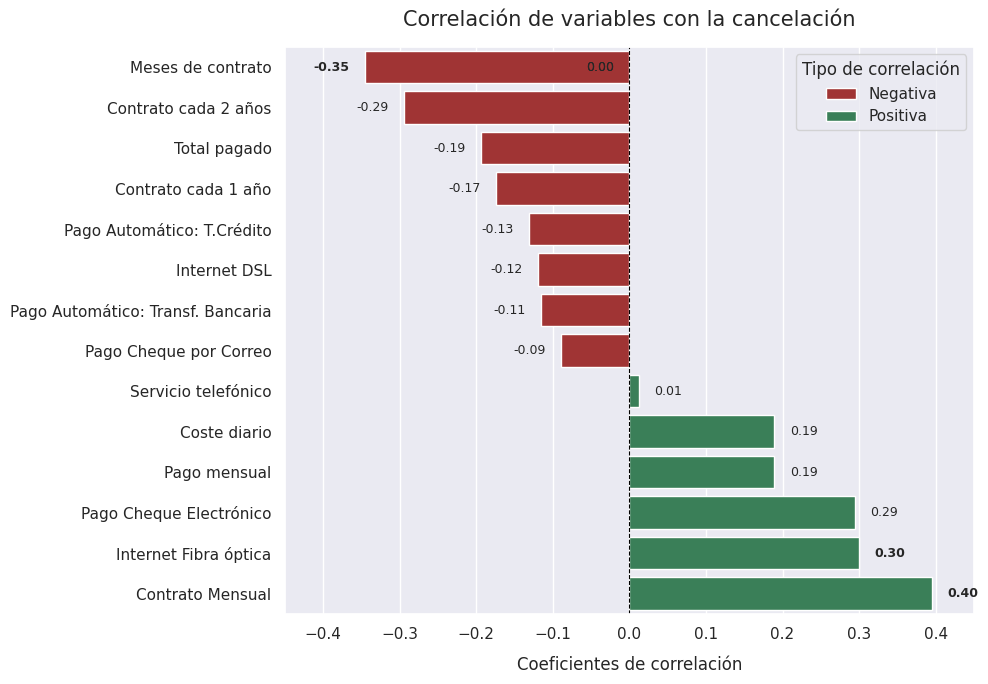

In [71]:
correlaciones = {
    'Contrato Mensual': 0.395067,
    'Meses de contrato': -0.345799,
    'Internet Fibra óptica': 0.300416,
    'Contrato cada 2 años': -0.294467,
    'Pago Cheque Electrónico': 0.294181,
    'Total pagado': -0.194440,
    'Coste diario': 0.189393,
    'Pago mensual': 0.189393,
    'Contrato cada 1 año': -0.174340,
    'Pago Automático: T.Crédito': -0.131448,
    'Internet DSL': -0.119945,
    'Pago Automático: Transf. Bancaria': -0.114953,
    'Pago Cheque por Correo': -0.089198,
    'Servicio telefónico': 0.012337
}


df_corr = pd.DataFrame.from_dict(correlaciones, orient='index', columns=['Correlación'])
df_corr = df_corr.sort_values(by='Correlación').reset_index().rename(columns={'index': 'Variable'})
df_corr['Tipo'] = df_corr['Correlación'].apply(lambda x: 'Positiva' if x > 0 else 'Negativa')


sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 7))
plot = sns.barplot(
    data=df_corr,
    x='Correlación',
    y='Variable',
    hue='Tipo',
    dodge=False,
    palette = {'Positiva': '#2E8B57','Negativa': '#B22222'}
)


plt.title('Correlación de variables con la cancelación', fontsize=15, pad=15)
plt.xlabel('Coeficientes de correlación', labelpad = 10)
plt.ylabel('')
plt.xlim(-0.45, 0.45)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend(title='Tipo de correlación')
plt.tight_layout()


for bar in plot.patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    variable = bar.get_y()
    value = width
    align = 'left' if width > 0 else 'right'
    offset = 0.02 if width > 0 else -0.02
    peso = 'bold' if abs(width) >= 0.30 else 'normal'
    plot.text(
        width + offset,
        y,
        f'{value:.2f}',
        va='center',
        ha=align,
        fontsize=9,
        fontweight=peso
    )

plt.savefig("/content/top_correlacion_cancelacion.png",  dpi=300, bbox_inches='tight')


plt.show()

Este análisis de correlación revela que los factores más asociados a la cancelación son los contratos mensuales, el uso de fibra óptica y los pagos frecuentes o elevados. En cambio, la permanencia prolongada, los contratos a largo plazo y los métodos de pago automatizados se relacionan con una mayor retención de clientes. Estos patrones confirman que el compromiso contractual y la comodidad en el pago son claves para reducir la fuga.



##📄 **Informe final**


### **1. Introducción**

El presente informe tiene como propósito analizar el fenómeno de la cancelación de servicios por parte de los clientes, conocido comúnmente como churn. El objetivo del análisis es identificar patrones y variables asociadas a este comportamiento, con el fin de generar recomendaciones que contribuyan a disminuir la pérdida de clientes.

####**2. Limpieza y Tratamiento de Datos**

Se realizó la importación del conjunto de datos original, seguida de un proceso exhaustivo de limpieza y transformación de los datos. En esta etapa:

Se eliminaron columnas redundantes, como Servicio_internet, (ya representada por las variables DSL y Fibra_óptica).

Se estandarizaron las variables categóricas y se transformaron en variables binarias (dummies) para facilitar su análisis.

Se generaron nuevas variables derivadas, "como Cuentas_diarias", a partir de los valores de pago mensual.

Se ajustaron los nombres de las variables para mejorar su comprensión en las visualizaciones.

Se normalizaron los nombres de las columnas con el fin de optimizar la estructura del análisis.


####**3. Análisis Exploratorio de Datos**

- **Distribución de Cancelación**

El volumen de cancelaciones registrado alcanza un umbral que amerita un estudio riguroso de las variables asociadas al comportamiento de abandono.

<img src= "https://github.com/jeyvelas/challenge_TelecomX/blob/main/Graficas/porcentajes_cancelacion.png?raw=true" width="600">


- **Comparación de Medios de Pago**

Entre los distintos métodos de pago, el cheque electrónico muestra la correlación más alta con la cancelación del servicio.


<img src="https://github.com/jeyvelas/challenge_TelecomX/blob/main/Graficas/grafico_metodos_pago.png?raw=true" width="600">


- **Tipo de Contrato**

El análisis de correlación indica que los contratos mensuales están positivamente asociados con el churn, mientras que las modalidades a mayor plazo (anuales o bianuales) presentan una relación inversa, favoreciendo la permanencia.

<img src="https://github.com/jeyvelas/challenge_TelecomX/blob/main/Graficas/grafico_tipo_contrato.png?raw=true" width="600">

- **Cuentas Totales y Tiempo de Permanencia**

Los patrones de cancelación están relacionados con clientes de bajo valor y corta permanencia, lo que sugiere una menor fidelización en este segmento.

<img src="https://github.com/jeyvelas/challenge_TelecomX/blob/main/Graficas/grafico_cuentas_tiempo.png?raw=true" width="600">

- **Tiempo de permanencia comparado con los gastos mensuales y diarios**


Los clientes que abandonan el servicio tienden a presentar tarifas mensuales más elevadas y menor antigüedad en la compañía. Este comportamiento sugiere que, si bien no cancelan de forma inmediata, los usuarios con altos costos y bajo nivel de fidelización son más propensos a cancelar dentro del primer año.

<img src="https://github.com/DaniBntz/TelecomX/blob/main/imagenes/comparacion_pago_mes_dia_y_tiempo.png?raw=true" width="600">

- **Tipos de servicio**

Los datos indican que los clientes con conexión a internet mediante fibra óptica presentan una mayor tasa de cancelación en comparación con otros tipos de servicio.

<img src="https://github.com/jeyvelas/challenge_TelecomX/blob/main/Graficas/tipos_servicios.png?raw=true" width="600">


- **Matriz de Correlación**

El gráfico presenta las variables que exhiben una relación estadísticamente significativa con la cancelación.


<img src="https://github.com/jeyvelas/challenge_TelecomX/blob/main/Graficas/correlacion_cancelacion.png?raw=true" width="600">


- **Gráfico de Correlaciones Ordenadas**

Expone de manera clara las variables que presentan mayor asociación, tanto positiva como negativa, con la cancelación del servicio.


<img src="https://github.com/jeyvelas/challenge_TelecomX/blob/main/Graficas/top_correlacion_cancelacion.png?raw=true" width="600">



####**4. Conclusiones e Insights**

🧩 Los clientes con contrato mensual, conexión por fibra óptica y pagos más frecuentes presentan una mayor probabilidad de cancelar el servicio.

🧩 En contraste, aquellos con contratos anuales o bianuales, pagos automáticos y mayor antigüedad tienden a mostrar una mayor fidelidad al servicio.

🧩 El tipo de contrato y el método de pago se identifican como factores particularmente influyentes: los clientes que utilizan cheque electrónico como medio de pago registran una tasa de cancelación significativamente más alta.

🧩 El costo diario y el monto del pago mensual presentan una correlación positiva con la cancelación, lo que sugiere que tarifas más elevadas —o la percepción de un alto costo— incrementan la probabilidad de abandono del servicio.

🧩 La conexión a internet mediante fibra óptica está asociada a mayores niveles de cancelación, mientras que los usuarios de tecnología DSL tienden a permanecer activos por más tiempo. Esta diferencia podría atribuirse a factores como la percepción de calidad del servicio, el costo asociado o variables no observadas directamente.



####**5. Recomendaciones**

🚨 Promover la migración hacia contratos de mayor duración mediante incentivos exclusivos o beneficios adicionales, con el objetivo de incrementar la retención.

🚨 Fomentar el uso de métodos de pago automáticos, dado que se asocian consistentemente con una menor tasa de cancelación.

🚨 Establecer un monitoreo proactivo de clientes con altos costos diarios o mensuales, ya que representan un segmento con mayor propensión al abandono.

🚨 Diseñar programas de fidelización que incluyan beneficios por permanencia o esquemas de reducción progresiva de tarifas, incentivando así relaciones contractuales a largo plazo.

🚨 Reformular las ofertas basadas en fibra óptica para mejorar su propuesta de valor, considerando que este tipo de conexión presenta una mayor asociación con la cancelación del servicio.

🚨 Implementar segmentaciones avanzadas para identificar clientes con alto riesgo de cancelación y aplicar estrategias de retención personalizadas y eficaces.

🚨 Desarrollar sistemas de alerta temprana que detecten patrones de comportamiento asociados al churn, permitiendo una intervención oportuna.